In [3]:
import pandas as pd
import plotly.express as px
import numpy as np



pd.set_option('display.float_format', lambda x: '%.5f' % x)


data_path = {
    'ratings': 'ratings.txt',
    'movies': 'netflix_titles.csv',
    'users': 'users.txt'
}


def load_data(data: str) -> pd.DataFrame:
    """
    Loads data from specified csv

    Args:
        data (str): name of the data 

    Returns:
        pd.DataFrame: dataframe with data loaded
    """
    df = pd.read_csv(data_path[data], \
                        sep=',', \
                        engine='python', \
                        encoding='utf_8_sig')

    return df




def movie_data_treatment(df_movies: pd.DataFrame) -> pd.DataFrame:
    """
    Creates custom id column and drops unnecessary columns

    Args:
        df_movies (pd.DataFrame): movies data 

    Returns:
        pd.DataFrame: dataframe with treated data
    """    
    # creates custom id column
    df_movies['idMovie'] = [i for i in range(1, len(df_movies) + 1)]
    # first 3952 movies
    movies_id = [i for i in range(0, 3952)]
    df_movies = df_movies.iloc[movies_id]
    df_movies = df_movies.drop('rating', axis=1)
    
    return df_movies
    
    
    
    
def ratings_data_treatment(df_ratings: pd.DataFrame) -> pd.DataFrame:
    # drop timestamp column
    df_ratings = df_ratings.drop('timestamp', axis=1)
    return df_ratings




movies = load_data('movies')
ratings = load_data('ratings')
users = load_data('users')
movies = movie_data_treatment(movies)
ratings = ratings_data_treatment(ratings)

In [4]:
movies[['idMovie', 'type', 'title', 'description', 'listed_in']]

,idMovie,type,title,description,listed_in
0,1,Movie,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",Documentaries
1,2,TV Show,Blood & Water,"After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries"
2,3,TV Show,Ganglands,To protect his family from a powerful drug lor...,"Crime TV Shows, International TV Shows, TV Act..."
3,4,TV Show,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...","Docuseries, Reality TV"
4,5,TV Show,Kota Factory,In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...
3947,3948,Movie,Ricardo Quevedo: Los amargados somos más,From how social media can ruin relationships t...,Stand-Up Comedy
3948,3949,Movie,Suzzanna: Buried Alive,"After a pregnant woman is murdered, her spirit...","Horror Movies, International Movies"
3949,3950,TV Show,Tango,Shocking secrets begin to unravel when the aft...,"International TV Shows, Romantic TV Shows, TV ..."
3950,3951,Movie,Ek Ladki Ko Dekha Toh Aisa Laga,As her family seeks to marry her off and a hop...,"Comedies, Dramas, International Movies"


In [5]:
df = pd.merge( ratings, movies, how='left', on='idMovie')
df

,idUser,idMovie,rating,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description
0,1,1193,5,s1193,Movie,The Present,Farah Nabulsi,"Saleh Bakri, Maryam Kanj, Maryam Kamiel Basha,...","United Kingdom,","March 18, 2021",2020,24 min,"Dramas, International Movies",Yusuf and his daughter set out to buy his wife...
1,1,661,3,s661,TV Show,Black Lightning,NaN,"Cress Williams, James Remar, Marvin 'Krondon' ...",United States,"June 19, 2021",2021,4 Seasons,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",School principal and retired superhero Jeffers...
2,1,914,3,s914,Movie,Time to Dance,Stanley Menino D'Costa,"Sooraj Pancholi, Isabelle Kaif, Rajpal Yadav, ...",India,"May 7, 2021",2020,107 min,"Dramas, International Movies, Romantic Movies",When a ballroom dancer’s shot at a crucial tou...
3,1,3408,4,s3408,Movie,Tatu,Don Omope,"Rahama Sadau, Sambasa Nzeribe, Segun Arinze, G...",Nigeria,"October 18, 2019",2017,101 min,"Action & Adventure, Dramas, International Movies","Doubting her future as a nun, a woman attempts..."
4,1,2355,5,s2355,Movie,Destiny,Youssef Chahine,"Nour El-Sherif, Laila Elwi, Mahmoud Hemeida, S...","France, Egypt","June 19, 2020",1997,136 min,"Dramas, International Movies","In 12th-century Spain, a philosopher and his p..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,s1091,Movie,Story of Kale: When Someone's in Love,Angga Dwimas Sasongko,"Ardhito Pramono, Aurélie Moeremans, Arya Salok...",Indonesia,"April 8, 2021",2020,78 min,"Dramas, International Movies, Romantic Movies","After leaving a toxic relationship, Dinda emba..."
1000205,6040,1094,5,s1094,TV Show,The Big Day,NaN,NaN,India,"April 7, 2021",2021,2 Seasons,"International TV Shows, Reality TV, Romantic T...","For six engaged couples, happily ever after be..."
1000206,6040,562,5,s562,Movie,Austin Powers in Goldmember,Jay Roach,"Mike Myers, Beyoncé Knowles-Carter, Seth Green...",United States,"July 1, 2021",2002,94 min,"Action & Adventure, Comedies",The world's most shagadelic spy continues his ...
1000207,6040,1096,4,s1096,TV Show,This Is a Robbery: The World's Biggest Art Heist,NaN,NaN,NaN,"April 7, 2021",2021,1 Season,"Crime TV Shows, Docuseries, TV Mysteries","In 1990, two men dressed as cops con their way..."


In [6]:
num_users = len(df["idUser"].value_counts())
num_users

6040

In [7]:
num_items = len(df["idMovie"].value_counts())
num_items

3706

Text(0.5, 0, 'Valoración')

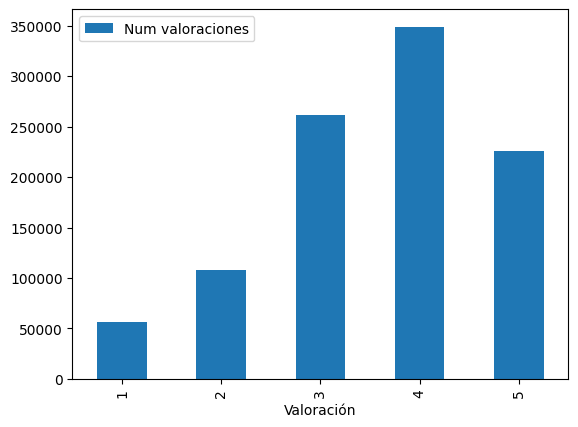

In [8]:

number_per_rating = pd.DataFrame( df.groupby( "rating").size(), columns = ["Num valoraciones"])

plot_ratings = number_per_rating.plot(kind = "bar")
plot_ratings.set_xlabel("Valoración")


In [9]:
#Numero de valoraciones por pelicula
num_rating_movies = pd.DataFrame( df.groupby( "title").size(), columns = ["Num valoraciones"])
num_rating_movies_asc = num_rating_movies.sort_values(by = ["Num valoraciones"])
num_rating_movies_asc

,Num valoraciones
title,
The Seventh Day,1
Monzón: A Knockout Blow,1
Downton Abbey,1
My MVP Valentine,1
My Octopus Teacher,1
...,...
Fear Street Part 2: 1978,2672
Just In Time,2883
Operation Varsity Blues: The College Admissions Scandal,2990


In [10]:
num_rating_movies_desc = num_rating_movies.sort_values(by = ["Num valoraciones"], ascending = False)
num_rating_movies_desc

,Num valoraciones
title,
Calico Critters Mini Episodes Clover,3428
Pahuna,2991
Operation Varsity Blues: The College Admissions Scandal,2990
Just In Time,2883
Fear Street Part 2: 1978,2672
...,...
Chip and Potato,1
SETHUM AAYIRAM PON,1
Cinema Bandi,1


Text(0.5, 0, 'Orden películas')

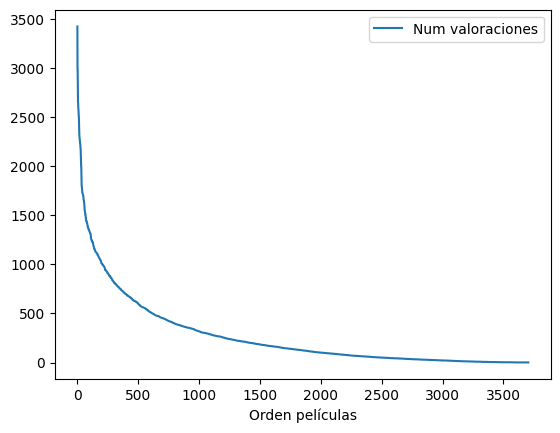

In [11]:
plot_movies = num_rating_movies_desc.reset_index(drop = True).plot()
plot_movies.set_xlabel("Orden películas")